In [106]:
from itertools import combinations
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt

## Lab2 - TSP

https://www.wolframcloud.com/obj/giovanni.squillero/Published/Lab2-tsp.nb

In [107]:
cities = pd.read_csv('cities/vanuatu.csv', header=None, names=['name', 'lat', 'lon'])

In [108]:
# Save for each couple save -> ( distance, index of compared city )
dist_matrix = np.zeros((len(cities), len(cities)), dtype=tuple)
for c1, c2 in combinations(cities.itertuples(), 2):
    dist_matrix[c1.Index, c2.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c2.Index)
    dist_matrix[c2.Index, c1.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c1.Index)

# Fast Resolution

Computing the closest city starting from the first

In [109]:
# Search min algorithm
visited = np.full(len(cities), False)
curr_city_i = 0
visited[curr_city_i] = True
path = list()
path.append(curr_city_i)

while not np.all(visited):

    # Find the city with minimum distance and take the correspondig index to make it the next city
    next_city_tup= np.min(dist_matrix[curr_city_i,np.logical_not(visited)])
    next_city_i = next_city_tup[1]
    curr_city_i= next_city_i

    path.append(curr_city_i)
    visited[curr_city_i] = True

# Print path and total lenght
circular_path = path + [path[0]]
tot_dist = 0
print("Path:")
for i in range(len(circular_path)-1):
    print(f"{cities.at[circular_path[i],'name']} -> {cities.at[circular_path[i+1],'name']} ({dist_matrix[path[i],circular_path[i+1]][0]:.2f}km)")
    tot_dist += dist_matrix[circular_path[i],circular_path[i+1]][0]

print(f"\nNumber of steps: {len(path)} , Total lenght: {tot_dist} km")


Path:
Isangel -> Vila (223.00km)
Vila -> Lakatoro (206.74km)
Lakatoro -> Norsup (2.46km)
Norsup -> Luganville (67.09km)
Luganville -> Port Olry (52.02km)
Port Olry -> Longana (105.77km)
Longana -> Sola (165.49km)
Sola -> Isangel (652.96km)

Number of steps: 8 , Total lenght: 1475.5280911045297 km


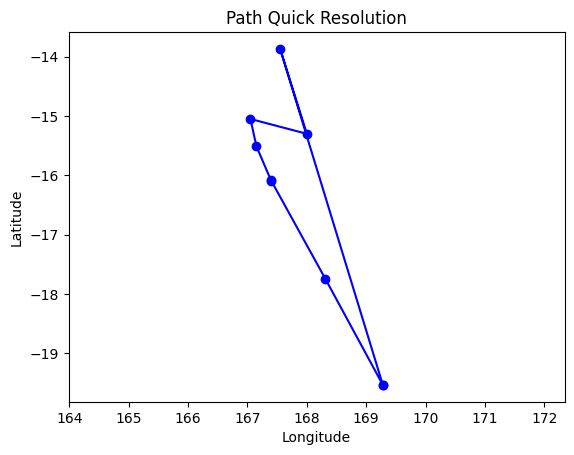

In [110]:
x_coordinates = [cities.at[i,'lon'] for i in circular_path]
y_coordinates = [cities.at[i,'lat'] for i in circular_path]


plt.figure()
plt.title("Path Quick Resolution")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.plot(x_coordinates,y_coordinates,marker='o', linestyle='-', color='b')
plt.show()